# Web Scraping Tutorial

## Introduction

A lot of the flashy parts of data science involve using pre-collected data and analyzing it to obtain meaningful observations. However, the key to being able to do any of this is the data. There are many problems that could be analyzed quite easily if only datasets were available to be analyzed. However, this data collection process can often be the hardest part of the process.

One method of data collection that is very accessible is web scraping. This is the process of going through websites and systematically obtaining data from them. Of course, this can be done manually, but that would be extremely inefficient. Instead, the common method employed is to use a web scraper - an application that can scrape without manual intervention and do that job much faster and more efficiently than a human.

This tutorial will introduce you to scrapy, an easy python webscraper that can be used without having to manually code an entire scraper from the ground up.

## Installation

Scapy can be installed very easily.
For those of you that have conda to manage their packages, 
the installation can be done using the terminal command:

```bash
conda install -c conda-forge scrapy
```

otherwise, you can install it using 


```bash
pip install Scrapy
```

once Scrapy is installed, make sure that the following import works

In [27]:
import scrapy

## Scrapy basics

The main class that we will be using to scrape is the scrapy.Spider class. Any scrapers that we will build will subclass this class, and utilize its methods to make things more manageable. 

Within this class, you are able to:
1. Set the initial requests
2. limit the scope of the spider
3. Define which pages to follow
4. parse information from downloaded pages
5. log information as you go

and much more... so let's begin

In order to get started, we must first start a new scrapy project. Within the desired directory, enter the terminal command:

```bash
scrapy startproject project_name
```

this will create a new directory with a few starter files 


In [9]:
!scrapy startproject tutorial

New Scrapy project 'tutorial', using template directory '/anaconda/lib/python3.6/site-packages/scrapy/templates/project', created in:
    /Users/briandavis/CarnegieMellon/388/Tutorial/tutorial

You can start your first spider with:
    cd tutorial
    scrapy genspider example example.com


These are the files that are created:

In [14]:
%%bash
cd tutorial/tutorial
ls

__init__.py
__pycache__
items.py
middlewares.py
pipelines.py
settings.py
spiders


Now that we have a project, lets create our first spider!
I will be choosing Reddit as the website to crawl today, but this same spider can be applied to other websites with small modifications.
Within the subfolder entitled `spiders` create a new file called `tutorial_spider.py` and input the following code:

In [ ]:
import scrapy

class RedditSpider(scrapy.Spider):
    name = "reddit"
    
    def start_requests(self):
        pass
    
    def parse(self, response):;
        pass

This creates a spider subclassed from the scrapy.Spider class that is named `reddit`.

The name is important since when we eventually run our finished spider, we will use the command

```
scrapy crawl reddit
```

We will now complete the start_requests method to the class to tell the spider where to start its crawl. This method is called once when the spider is initialized. You can give it as many start points as you want, but they must be in a iterable form of Requests. All other pages that the spider crawls to will be branches from these intial pages. 

another way you can do it is to set a var named `start_urls` equal to a list of the starting urls. 

Add the following code to the class:

In [ ]:
def start_requests(self):
    urls = ['https://www.reddit.com/r/AskReddit//']
    
    for url in urls:
        yield scrapy.Request(url=url, callback = self.parse)

I specified 1 starting point for the crawler: the AskReddit subreddit. The above code generates an iterator of this url, and specifies the callback function as self.parse. The parse function is what takes the response of the given pages and extracts the necessary information. If you wanted to add more starting points, you would simply modify the urls list to include other subreddits, and the crawler would address each subreddit in the order that they are specified. 

Usually, a single crawler should be limited in scope so as to make it more modular. Therefore, instead of adding more start points, it might be a better idea to create an additional crawler to traverse separate subreddits

In order to limit the scope of the crawler, you can also add an optional `allowed_domains` variable to the class that takes a list of domains that the spider is bounded by.

Since I am only scraping from reddit sites, I will add the following line to the class:

```python
allowed_domains = ["reddit.com"]
```

We will now write the parse function.

In [ ]:
def parse(self, response):
    
    for post in response.css("div.thing"):
        title = post.css('.title.may-blank::text').extract_first()
        votecount = post.css('.score.unvoted::text').extract_first()
        time = post.css('time::attr(title)').extract_first()
        comment_count = post.css('.comments::text').extract_first()

    
        yield {
            'title' : title,
            'votes' : votecount,
            'created_at' : time,
            'comments' : comment_count,
        }

Lets break this down.

First of all, this parse function takes in a response. This response is the webpage that the spider queries. In our spider, the first page that will be passed to this parse function is 'https://www.reddit.com/r/AskReddit//', since it is the first link provided by the start_requests function.

Given this response, the parse function is responsible for selecting all necessary information from the page and returning it. 

In our example, we are scraping the titles, vote counts, time of creation, and comment counts of each of the posts from the front page. These are accessed by searching the css classes of the response and accessing the specific portions of the document in which the content resides. For example, the titles of each post are located under within the "title may-blank" class, and are accessed by the line

```python
title = post.css('.title.may-blank::text').extract_first()
```

The names of the corresponding classes can be obtained by inspecting the html of the webpage, either by manually querying the website for a response, or by using the developer tools of a web browser like chrome. 

After scraping the various items, Each of these items are then put into a dictionary for easy access, and are returned by the scraper.

Now let's run the code to see what it returns. In order to see what was scraped, lets redirect the output of a spider to a json file using the line 

```bash
scrapy crawl reddit -o redditinfo.json
```

In [2]:
%%bash
cd tutorial
scrapy crawl reddit -o redditinfo.json

2018-04-01 16:46:59 [scrapy.utils.log] INFO: Scrapy 1.5.0 started (bot: tutorial)
2018-04-01 16:46:59 [scrapy.utils.log] INFO: Versions: lxml 3.7.3.0, libxml2 2.9.4, cssselect 1.0.3, parsel 1.4.0, w3lib 1.19.0, Twisted 17.5.0, Python 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:04:09) - [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)], pyOpenSSL 17.0.0 (OpenSSL 1.0.2n  7 Dec 2017), cryptography 1.8.1, Platform Darwin-16.7.0-x86_64-i386-64bit
2018-04-01 16:46:59 [scrapy.crawler] INFO: Overridden settings: {'BOT_NAME': 'tutorial', 'FEED_FORMAT': 'json', 'FEED_URI': 'redditinfo.json', 'NEWSPIDER_MODULE': 'tutorial.spiders', 'ROBOTSTXT_OBEY': True, 'SPIDER_MODULES': ['tutorial.spiders']}
2018-04-01 16:46:59 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats']
2018-04

To see what the spider returned, lets inspect the output file redditinfo.json

In [179]:
%%bash
cd tutorial
less redditinfo.json

[
{"title": "Introducing... AssCredit!", "vote": "4553", "created_at": "Sun Apr 1 02:55:03 2018 UTC", "comments": "514 comments"},
{"title": "Would you continue to be vegan if you had to grow every single vegetable you wanted to eat? Why or why not?", "vote": "10.1k", "created_at": "Sun Apr 1 19:45:46 2018 UTC", "comments": "1065 comments"},
{"title": "Would you continue eating meat if you had to kill the animal yourself every time? Why or why not?", "vote": "24.9k", "created_at": "Sun Apr 1 14:06:15 2018 UTC", "comments": "9343 comments"},
{"title": "Reddit, what are some good examples of spending money to save money?", "vote": "5898", "created_at": "Sun Apr 1 11:00:52 2018 UTC", "comments": "3743 comments"},
{"title": "Dear Reddit, what is the best April Fool's Day Prank you ever saw, completed yourself, or heard about?", "vote": "1983", "created_at": "Sun Apr 1 13:11:56 2018 UTC", "comments": "786 comments"},
{"title": "Prison guards of reddit, what's the scariest day on the job you

If you cross reference this output with the content from a web browser, you can see that all of the info matches. However, you will also notice that this info only corresponds to the first page of the subreddit.

In order to obtain more information, we will need to be able to have the spider automatically detect and go to new pages. We can add this capability within the parse function by modifying the function with the following code:



In [11]:
next_page = response.css(".next-button::attr('href')")
if next_page:
    url = response.urljoin(next_page[0].extract())
    yield scrapy.Request(url, self.parse)

A slightly simpler way to do it would be with this code instead:

In [ ]:
for href in response.css('span.next-button a::attr(href)'):
    yield response.follow(href, callback=self.parse)

after running it again, the redditinfo file now contains much more information, as the spider was able to crawl many more pages

In [40]:
%%bash
cd tutorial
less redditinfo.json

[
{"title": "Introducing... AssCredit!", "vote": "4353", "created_at": "Sun Apr 1 02:55:03 2018 UTC", "comments": "506 comments"},
{"title": "Would you continue eating meat if you had to kill the animal yourself every time? Why or why not?", "vote": "16.9k", "created_at": "Sun Apr 1 14:06:15 2018 UTC", "comments": "6632 comments"},
{"title": "Reddit, what are some good examples of spending money to save money?", "vote": "4515", "created_at": "Sun Apr 1 11:00:52 2018 UTC", "comments": "2896 comments"},
{"title": "Prison guards of reddit, what's the scariest day on the job you've ever had?", "vote": "3597", "created_at": "Sun Apr 1 09:21:32 2018 UTC", "comments": "819 comments"},
{"title": "Dear Reddit, what is the best April Fool's Day Prank you ever saw, completed yourself, or heard about?", "vote": "1046", "created_at": "Sun Apr 1 13:11:56 2018 UTC", "comments": "472 comments"},
{"title": "People who have walked out of a job in the middle of the day, what was the last straw?", "vote":

## Logging

Finally, if you would like to keep track of info while you are scraping the web, you can log activity using scrapy's built in logging function.

Very simply, you will need to call it in the parsing stage of you crawl. For example, if you wanted to keep track of all the websites that you crawl through, you can insert the following line into the parse function:

```python
self.logger.info('Parse function called on %s', response.url)
```

there are many different types of logging availailable for you to use, including debug, info, warning, error, and critical messages.

After all the additions above, your code should look like this:

In [ ]:
import scrapy

class RedditSpider(scrapy.Spider):
    name = "reddit"
    allowed_domains = ["reddit.com"]
    
    def start_requests(self):
        urls = ['https://www.reddit.com/r/AskReddit//']

        for url in urls:
            yield scrapy.Request(url=url, callback = self.parse)
    
    def parse(self, response):
        
        self.logger.info('Parse function called on %s', response.url)
        for post in response.css("div.thing"):
            title = post.css('.title.may-blank::text').extract_first()
            votecount = post.css('.score.unvoted::text').extract_first()
            time = post.css('time::attr(title)').extract_first()
            comment_count = post.css('.comments::text').extract_first()


            yield {
                'title' : title,
                'votes' : votecount,
                'created_at' : time,
                'comments' : comment_count,
            }
            
        next_page = response.css(".next-button::attr('href')")
        if next_page:
            url = response.urljoin(next_page[0].extract())
            yield scrapy.Request(url, self.parse)

Though short, this code is able to extract a very large amount of information with amazing speed.

## Using the Data

Now that you are able to web scrape from subreddits, you can use it to your heart's content. First, however, you must transform it into a usable form.

When we implemented our spider, we did it in a way that yielded lists of dictionaries. This form was then saved into a json file. Therefore, we can easily access the data by reading the file using ```json.loads``` and then converting it into a pandas dataframe.

Below I read in files that contain the output of scrapes from both the AskReddit as well as the Programmer Humor subreddit.

In [173]:
import json

with open('./tutorial/askreddit.json') as f:
    ask_reddit = json.loads(f.read())
    f.close()

In [174]:
with open('./tutorial/programmerhumor.json') as f:
    programmer_humor = json.loads(f.read())
    f.close()

Now you can easily create dataframes from the files and use them to analyze the data

In [175]:
import pandas as pd

In [176]:
ask_frame = pd.DataFrame(ask_reddit)
humor_frame = pd.DataFrame(programmer_humor)

For example, if you wanted to plot the number of posts with votes in specific ranges, you could do it like this

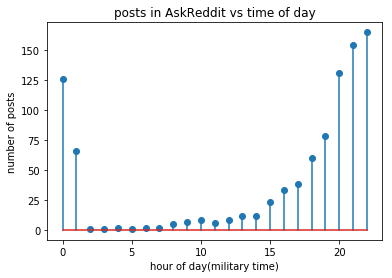

In [177]:
import matplotlib.pyplot as plt

ask_frame["created_at"] = pd.to_datetime(ask_frame["created_at"])
ask_frame["hours"] = ask_frame["created_at"].map(lambda x: x.hour)
ask_hour_frame = ask_frame.groupby(["hours"]).count()
ask_counts = ask_hour_frame["vote"]
 
plt.stem(ask_counts)
plt.title("posts in AskReddit vs time of day")
plt.xlabel("hour of day(military time)")
plt.ylabel("number of posts")
plt.show()

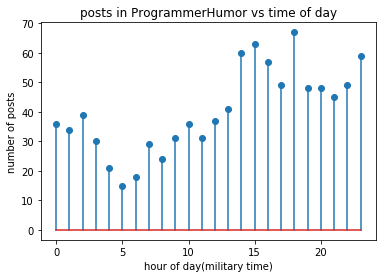

In [178]:
humor_frame["created_at"] = pd.to_datetime(humor_frame["created_at"])
humor_frame["hours"] = humor_frame["created_at"].map(lambda x: x.hour)
humor_hour_frame = humor_frame.groupby(["hours"]).count()
humor_counts = humor_hour_frame["vote"]
 
plt.stem(humor_counts)
plt.title("posts in ProgrammerHumor vs time of day")
plt.xlabel("hour of day(military time)")
plt.ylabel("number of posts")
plt.show()

Just from this simple analysis we can gather some interesting conclusions about the two subreddits. As you can see, AskReddit seems to gain activity as the UTC goes later. However, the ProgrammerHumor subreddit does not fluctuate as much, and has relatively consistent participation throughout the day, suggesting that it has a more global base. 

Although this is a fairly simple example, you can gather much more complex sets of data using very slight modifications to the crawler that we built above. By playing around with this library, you will be able to gather the kind of data that would be humanly impossible otherwise.

Happy Scraping!